## 손실함수와 경사하강법의 관계

- 어떤 손실함수가 정의되었을 때 손실함수의 값과 실제 타깃값의 차이를 함수로 정의한 것
- 선형회귀 실습에서 '오차를 변화율에 곱하여 가중치와 절편을 업데이트 했던 것'은 **제곱오차**라는 손실함수를 미분한 것을 의미

## 손실함수를 사용하는 목적

- 손실함수의 값, 즉 '오차'를 경사 하강법을 통해 줄여나가기 위함
- 함수여야만 하는 이유는 미분을 위해. 상수의 정확도는 미분하면 0이기 때문에 업데이트 용으로 이용 불가



## 손실함수(loss function)

- 실제값과 예측값에 대한 오차에 대한 식으로 함수의 값을 최소화하고자 하는 함수
- 오답에 가까울수록 큰 값, 정답에 가까울수록 작은 값임
- 실제와 예측값의 단순 오차의 표현이 아닌, 예측값의 오차를 줄이는 데 최적화된 식이어야

### 1. 제곱 오차(squared error)

### SE = (y - y^) ^2
- 타깃값과 예측값을 뺀 다음 제곱한 것
- 제곱의 이유? 1) 값이 음수일 수도 있음 2)미분을 위해
- 제곱 오차 함수의 최소값을 알기 위해 기울기에 따라 함수의 값이 낮은 쪽으로 이동해야
- 기울기는 제곱오차를 가중치나 절편에 대해 미분하여 구함

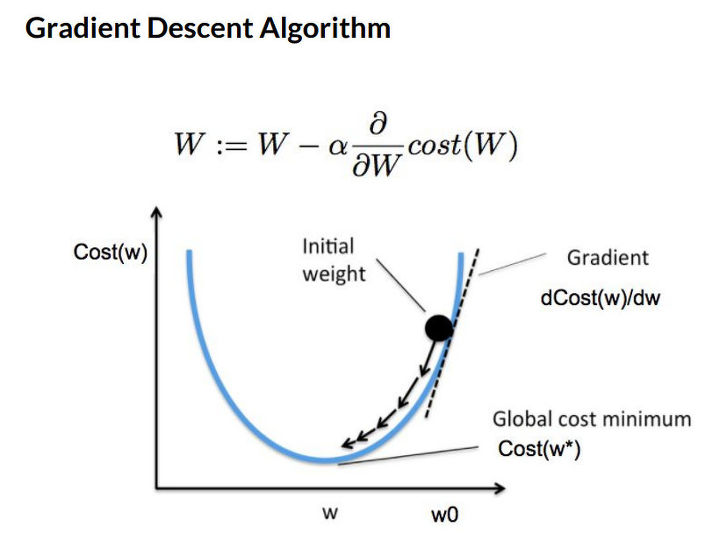

- 제곱 오차를 가중치(w)에 대해 편미분하고
- 제곱 오차를 절편(b)에 대해 편미분하여
- 각각의 변화율을 이용하여 가중치와 절편을 업데이트함
- 결과로, 앞에서 오차 역전파로 업데이트한 것과 같은 식이 만들어짐
    - w = w + w_rate*err
    - b = b + 1*error

### 2. MSE(Mean Squared Error, 평균제곱오차)

### MSE = 1/n * sigma(y - y^) ^2
- 훈련용 사례 건수가 nxm(에포크)일 때
- m개의 사례(미니배치)에 대한 개별적인 제곱 오차의 평균을 계산하는 손실 함수

In [1]:
import numpy as np
def mse(y, y_hat):
    return (1/2)*np.sum((y-y_hat)**2)

### 3. CEE(Cross Entropy Error, 교차엔트로피 오차)

### CEE = -sigma(t_i x log_e(y_i)
- t_i는 y^을, y_i는 y를 의미
- 실제 정답과의 오차만을 파악하는 손실함수임

**엔트로피 식과 비교하면**

- H(p) = -sigma(p(x) * log(p(x)))
- 교차엔트로피의 두 인자가 t_i, y_i인 것을 고려하면, 타겟과 정답이 얼마나 가까운지 서로의 정답을 checking하는 컨셉임을 알 수 있음
- 즉 y와 y^이 얼마나 유사한지, y^을 y에 가깝게 하는 loss를 최소화하는 hyperparameter를 찾고자하는 목표를 가짐
- 엔트로피는 정보량의 기대값을 의미 (정보이론 참고)
    - 정답 확률이 낮으면 가지고있는 정보량이 많고
    - 정답 확률이 높으면 가지고있는 정보량이 적음
- 다시말해 확률 또는 확률 밀도가 특정 값에 몰려있으면 엔트로피가 작다고 하고, 반대로 여러가지 값에 골고루 퍼져있다면 엔트로피가 크다고 함 (엔트로피가, 주사위(균등) > 윷(불균등, not 1/5)

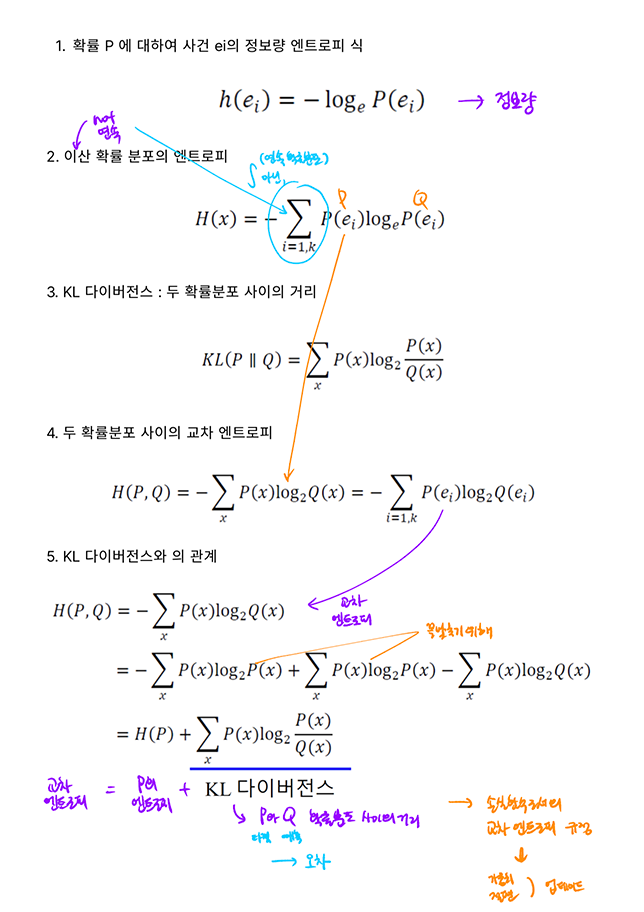

In [2]:
def cee(y, y_hat):
    delta = 1e-7
    return -np.sum(y_hat * np.log(y + delta)) #진수가 0일 때 수치연산이 불가능하니, 연산이 가능하도록 아주 작은 값인 delta를 더해줌

In [3]:
#배치용 교차엔트로피 오차함수는 교차엔트로피 오차의 합을 N(데이터의 개수)으로 나눔으로써 평균 손실함수를 구함
def crossEntropyError(y, y_hat):
    delta = 1e-7
    return -np.sum(y_hat * np.log(y+delta)) / y.shape[0] #y.shape[0]은 배치의 크기

#### 어떻게 교차엔트로피가 손실함수로서 쓰일 수 있는가

**-> P와 Q의 교차 엔트로피 H(P,Q)
= H(P) + sigma(P(x)*log_2(P(x)/Q(x)))
= P의 엔트로피 + P와 Q 간의 KL 다이버전스**
이기 때문

-> 즉 P(x)가 정답, Q(x)가 예측이라고 생각하면, P와 Q의 거리(오차)가 바로 교차엔트로피 오차이기 때문

- 교차엔트로피 -> 정답과 예측값 사이의 loss를 나타냄 -> 이 교차엔트로피는 KL다이버전스(정답과 예측값 사이의 거리)를 나타냄 + P의 엔트로피와 같음

- 따라서 교차엔트로피를 손실함수로 사용할 수 있음

#### 추가로 엔트로피 정의시 로그를 취하는 이유

- 곱셈으로 늘어나는 경우의 수를 덧셈으로 바꿔주기 위함
- 로그를 취하면 정보량과 선형적인 관계로 바꿀 수 있음
- 로그의 밑이 e or 2인 이유는 -> 최대한 많은 수를 표현하기 위해
- 물리학과는 e, 전산학과는 2를 주로 쓴다고 생각하면 되려나

#### 정답률과 오차 값의 관계 (MSE, CEE)

In [4]:
import numpy as np

# one-hot encoding : 값이 2인 인덱스가 정답
y = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 2번 인덱스에 가장 큰 정답률을 부여함
y_hat1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

# 7번 인덱스에 가장 큰 정답률을 부여함
y_hat2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

In [5]:
#MSE
#실제 정답에 대한 정답률의 오차 뿐만 아니라, 다른 오답들에 대한 정답률 오차 또한 포함하여 계산함

print(mse(np.array(y), np.array(y_hat1)))
print(mse(np.array(y), np.array(y_hat2)))

0.09750000000000003
0.5975


정답에 가까울수록 오차 값이 작음을 알 수 있음

In [6]:
#CEE

print(cee(np.array(y), np.array(y_hat1)))
print(cee(np.array(y), np.array(y_hat2)))

6.447238200383332
14.50628607586249


정답에 가까울수록 오차 값이 작음을 알 수 있음

## 활성화함수

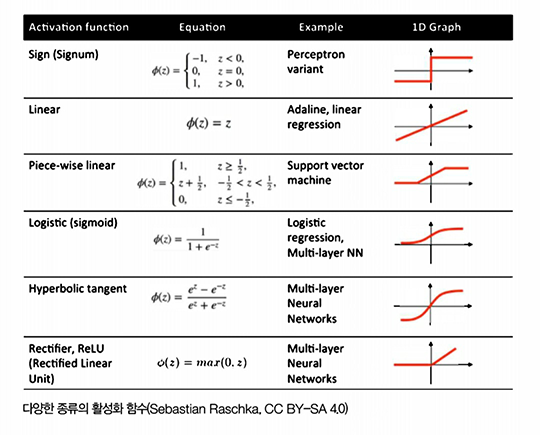

- 어떤 입력값에 대해 적절히 처리하여 결과값을 원하는 값으로 내놓게 함
- 이를 통해 출력된 신호가 다음 단계에서 활성화되는지를 결정함
- 목적에 따라 선택하면 됨

### 1. Sigmoid function

### f(x) = sigmoid(x) = 1/(1+e^-x)
- 0~1의 범위에서 곡선으로 표현됨 -> 값이 이어진다 -> 회귀
- 미분에 용이

### 2. ReLU(Rectified Linear Unit) function

### h(x) = 0 (x <= 0), h(x) = x (x > 0)
- 0보다 크면 그대로, 작으면 0으로 출력
- 그래프의 꼴은 0 이상에서 x와 비례하여 증가하는 꼴
- 즉 0 초과값은 x를 그대로 반환하기 때문에 x의 특징값을 그대로 살려둘 수 있음
- 시그모이드함수보다 계산도 간단하고 학습도 빠름
- 음수에서는 미분값이 아예 0이기 때문에 학습 불가

### 3. Softmax function

### sigma(z)_j = e^z_j/sigma(e^z_k)
- 다중분류문제에서 가장 자주 사용되는 활성화 함수로, 출력되는 output의 합이 1이 되도록 출력함
- 분류하고 싶은 클래스의 수만큼 출력으로 구성함
- 가장 큰 출력값을 부여받은 클래스가 확률이 가장 높을 것
- 결과값을 원핫인코딩의 입력으로 연결하여, 가장 큰 값만 True, 나머지는 False로 하여 이용하기도 함
- ReLU보다도 빠름. 그렇지만 특징을 뭉뚱그릴 수도 있음에 유의


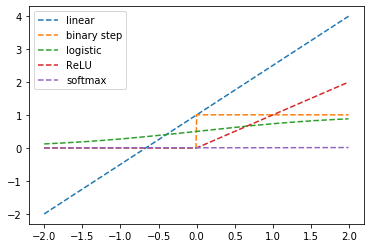

In [8]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(-2, 2, 0.01)

def linear_func(x): #1차함수
    return 1.5 * x + 1 #기울기 a = 1.5, 절편 b = 1, 임의값
plt.plot(x, linear_func(x), linestyle = '--', label = 'linear')

def binarystep_func(x): #계단함수
    return (x>=0) * 1
    #return np.array(x>=0, dtype = np.int) #same
plt.plot(x, binarystep_func(x), linestyle = '--', label = 'binary step')

def logistic_func(x): #로지스틱 함수
    return 1 / (1 + np.exp(-x))
plt.plot(x, logistic_func(x), linestyle = '--', label = 'logistic')

def relu_func(x): #렐루 함수
    return (x>0) * x
    #return np.maximum(0,x) #same
plt.plot(x, relu_func(x), linestyle = '--', label = 'ReLU')
    
def softmax_func(x): #소프트맥스 함수
#     x = np.exp(x)
#     return x / np.sum(x) #이렇게 간단하게 구현할 수 있지만, exp함수에서 오버플로우가 발생할 수 있음
    m = np.max(x) #이를 방지하기 위해 argument의 max 값을 차감해줌
    x = x - m
    x = np.exp(x)
    return x / np.sum(x)
plt.plot(x, softmax_func(x), linestyle = '--', label = 'softmax')

plt.legend()
plt.show()